In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [16]:
full_dataset=pd.read_csv("Dataset\\full_dataset.csv")

In [17]:
full_dataset.shape


(2231142, 7)

In [20]:
sample = full_dataset.sample(frac=0.01, random_state = 1)
sample.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
7964,7964,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1765246,1765246,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
677031,677031,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
1325712,1325712,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
294137,294137,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [11]:
# pip install bertopic

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Monika\\anaconda3\\Lib\\site-packages\\~aml\\_yaml.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp38-cp38-win_amd64.whl size=571545 sha256=4919a6d8bb5aa7d4aa4357b072836030cebef2c8f0e27e91de931ffb50aba309
  Stored in directory: c:\users\monika\appdata\local\pip\cache\wheels\dc\71\35\27e492e5848c7d1b38a6ea86e10261fd7ebaabf7e72c0b47c4
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=f5e80e6e15e0435fb4785dec3cf8878c53ef18e9a0393e473d892f91e2631c4e
  Stored in directory: c:\users\monika\appdata\local\pip\cache\wheels\0c\b6\fb\2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e60862794dc0e308bce7881335988f32af9e123d15d6d89bb760f79e42d67954
  Stored in directory: c:\users\monika\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=02a400623001ea8

In [14]:
# sample.to_csv("Dataset\\Recipe_sample_dataset.csv")

In [21]:
sample.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
7964,7964,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1765246,1765246,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
677031,677031,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
1325712,1325712,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
294137,294137,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [61]:
full_dataset['NER'] = full_dataset['NER'].str.lower()
ln=full_dataset['NER'].size
ner_all=full_dataset['NER'].tolist()

#print(ner_all)
print(type(ner_all))
ner_all[0]

ingredient_freq = {}

for i in range(ln):
    tmp_ner=ner_all[i].replace("\"", "")
    tmp_ner=tmp_ner.replace("[", "")
    tmp_ner=tmp_ner.replace("]", "")
    ner_lst=tmp_ner.split(", ")
    #print(type(ner_lst))
    
    for item in ner_lst:
        if item in ingredient_freq:
            ingredient_freq[item] += 1
        else:
            ingredient_freq[item] = 1
    
    
    
    
  
    




<class 'list'>


In [67]:
print(type(ner_lst))
print(len(ner_lst))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [68]:
#ingredient_freq

ingredient_freq_sorted = sorted(ingredient_freq.items(), key=lambda x: x[1], reverse=True)  


ingredient_freq_sorted[0]

for j in range(50):
    print(ingredient_freq_sorted[j])

    
    
    
print(len(ingredient_freq_sorted))    

('salt', 1013709)
('sugar', 662838)
('butter', 539978)
('flour', 488086)
('eggs', 422212)
('onion', 391270)
('garlic', 388187)
('milk', 370285)
('water', 351248)
('vanilla', 293879)
('olive oil', 227383)
('pepper', 193384)
('brown sugar', 187092)
('egg', 176197)
('tomatoes', 174311)
('baking powder', 161100)
('lemon juice', 155454)
('cinnamon', 128619)
('sour cream', 122731)
('cream cheese', 121520)
('baking soda', 120743)
('celery', 116653)
('margarine', 114909)
('chicken', 114504)
('cheddar cheese', 111260)
('parsley', 107769)
('vegetable oil', 103011)
('onions', 102596)
('mayonnaise', 93146)
('parmesan cheese', 92833)
('oil', 89946)
('pecans', 83320)
('potatoes', 81824)
('kosher salt', 81509)
('carrots', 80450)
('nuts', 79693)
('soy sauce', 79678)
('black pepper', 77694)
('pineapple', 76432)
('honey', 73864)
('bacon', 72351)
('thyme', 72215)
('chicken broth', 68993)
('oregano', 68514)
('ground beef', 67258)
('mustard', 66948)
('unsalted butter', 66539)
('worcestershire sauce', 65377

array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

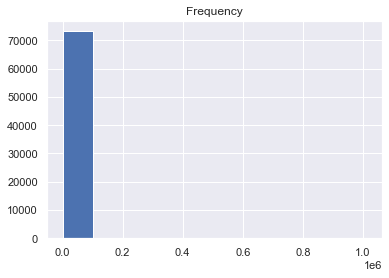

In [122]:
ingredient_freq_df=pd.DataFrame.from_dict(ingredient_freq, orient='index', columns=['Frequency'])

ingredient_freq_df=ingredient_freq_df.reset_index()

ingredient_freq_df

ingredient_freq_df.columns = ingredient_freq_df.columns.str.replace('index', 'Ingredient')

ingredient_freq_df

# # fig = px.bar(ingredient_freq_df, x="Ingredient", y="Frequency")
# # fig.show()

# ingredient_freq_df_tmp= ingredient_freq_df.loc[ingredient_freq_df['Frequency']>1]

# ingredient_freq_df_tmp
ingredient_freq_df_tmp.hist(x='Frequency', y='')

In [114]:
import seaborn as sns


In [118]:
sns.set(style="darkgrid")

KeyboardInterrupt: 

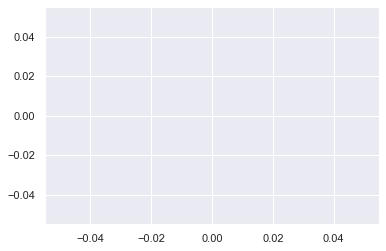

In [119]:
sns.histplot(data=ingredient_freq_df, x="Frequency")
plt.show()